<a href="https://colab.research.google.com/github/ceydab/NLP_Projects/blob/main/LanguageIdentificationwithLinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Natural Language Processing: Language Classification

This notebook shows an example on how to use machine learning techniques for language classification.

It starts with importing the dataset and splitting it correctly. Next, preprocessing, tokenization, vectorization, and training functions are introduced. Then the dataset is processed through these functions to get predictions for the test set. Then the classification report, weights of the features used by the model, and the confusion matrix are printed.

Following, we use the two best performing languages and take them through a filtering process that limits the characters in the texts. First, we use all characters, then the first 500 characters, and lastly the first 100 characters.


In [ ]:
pip install eli5

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import eli5
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:00<00:00, 179MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:01<00:00, 34.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 28.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 98.2MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

In [ ]:
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [ ]:
print("train set: ", train_df['label'].value_counts())
print("test set: ", test_df['label'].value_counts())


train set:  label
ltz    500
est    500
swe    500
nav    500
mwl    500
      ... 
lim    500
guj    500
pnb    500
zea    500
krc    500
Name: count, Length: 235, dtype: int64
test set:  label
ckb    500
mwl    500
nld    500
tet    500
ace    500
      ... 
glk    500
lez    500
bul    500
nan    500
sco    500
Name: count, Length: 235, dtype: int64


There are 500 instances per label in each dataset. This is not an appropriate split. 80-20 split will be taken.

In [ ]:
all_set = pd.concat((train_df,test_df), axis = 0)
X_train, X_test, y_train, y_test = train_test_split(all_set['text'], all_set['label'], train_size = 0.8, shuffle = True, stratify= all_set['label'])

train_df = pd.concat((X_train, y_train), axis=1)
test_df = pd.concat((X_test, y_test), axis=1)

We know obtain a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian
Afrikaans,
Arabic,
Azerbaijani,
Catalan,
Czech,
Finnish,
French,
Greek,
Hindi,
Hungarian,
Icelandic,
Italian,
Japanese,
Korean,
Lithuanian,
Malay,
Persian,
Polish,
Portuguese,
Romanian.


In [ ]:
languages = ['afr', 'ara', 'aze', 'cat', 'ces', 'fin', 'fra', 'ell', 'hin', 'hun', 'isl', 'ita', 'jpn', 'kor', 'lit', 'msa', 'fas', 'pol', 'por', 'ron', 'eng', 'deu', 'nld', 'dan', 'swe', 'nob']
train_df = train_df[train_df['label'].isin(languages)]
test_df = test_df[test_df['label'].isin(languages)]

Now, let's encode the labels to turn them into computationally readable type: numbers.

In [ ]:
le_fitted = LabelEncoder().fit(train_df['label'])
y_train_dev, y_test = le_fitted.transform(train_df['label']), le_fitted.transform(test_df['label'])

With this part, we are done with the labels. Now, let's move onto the text.

Since we are trying to identify languages, we don't need to dive too deep into feature space and remove instances such as stopwords.
We will apply the following actions as they do not play an identifying feature:

1. lowercase
2. remove numbers
3. remove punctuation
4. remove whitespaces

In [ ]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = text.translate(str.maketrans("","", string.punctuation))
  text = text.strip()
  return text

In [ ]:
#test
text = "`:.j c)=xZO?F-`l;@Jk]8?xDm)b0vCQg6{6-g~qH9KX'3dA~Y.o%W~?gFfJ{)W~bJ;9^&:>M$^8U1A7r~)"
preprocess(text)

'j cxzofljkxdmbvcqggqhkxdayowgffjwbjmuar'

Next, we will tokenize the text. This will include stemming. While this process is good practice for vectorization, due to language differences and the library's possible lack of enough information for some languages, it might not be as effective in some languages.

In [ ]:
def tokenize(preprocessed_text):
  stemmer= PorterStemmer()
  stem_text = []
  tokenized_text = word_tokenize(preprocessed_text)
  for word in tokenized_text:
    stemmed = stemmer.stem(word)
    stem_text.append(stemmed)
  return stem_text

In [ ]:
#test
text = "ciao monde deutsch grazie,python world italiano!français;hallo openai hola.3merci 5world bonjour2deutsch.1italiano4python - world!español, grazie hola;monde3hallo openai italiano hola bonjour monde 0deutsch.hello4danke español, grazie.2français!python world deutsch grazie:bonjour 1monde openai hola español!2merci mundo bonjour grazie français python hallo openai italiano - world español;français, grazie hello monde.0deutsch5hola openai italiano français - world 3español grazie bonjour monde!hello français italiano, grazie;monde python hallo openai español:1français bonjour 2monde!deutsch grazie italiano hola mundo;hello openai español français?0danke mundo hello français, grazie 4python italiano world hallo openai.3español bonjour 5monde hola français grazie deutsch!4hello openai italiano español, grazie.1monde python français grazie hello!world italiano hola español:hallo openai.2deutsch bonjour 3monde mundo grazie français;4python hola italiano hello openai!español, grazie 1monde français hallo python italiano-2world.3hola openai español grazie hello mundo;5deutsch français italiano bonjour grazie mundo español:python 0hola openai hello.3español monde italiano grazie hallo - world;français 2deutsch italiano grazie hello monde.openai español?4python hallo français hola openai grazie!5monde hello italiano bonjour grazie mundo.deutsch python hola openai!español 2français grazie hello mundo italiano;3world español bonjour hallo openai grazie:4python italiano français hello hola monde;5español grazie openai italiano hello francais - world:deutsch monde grazie hola hello italiano.openai français?python hola hello monde grazie!español 4français italiano mundo grazie hello.openai 5deutsch hello grazie hola italiano;español 3monde grazie hola hello italiano,openai;4python hello grazie italiano mundo español!5français hola grazie hello openai.0deutsch italiano monde grazie hola hello español:1world hello grazie italiano mundo français,openai - deutsch!2python grazie hola italiano monde español.3français grazie hello mundo italiano - openai!4deutsch hola grazie hello italiano monde.openai 5world grazie hola hello italiano,español - français!python monde grazie hola hello italiano.openai 1deutsch grazie hola hello italiano,français - mundo!2world grazie hola hello italiano español,openai:3python grazie hola hello italiano monde.4español grazie hola hello italiano mundo,openai-5deutsch grazie hola hello italiano,français.openai 0world grazie hola hello italiano español!python grazie hola hello italiano monde.openai 1deutsch grazie hola hello italiano,français;world!español grazie hola hello italiano.openai:2python grazie hola hello italiano monde 3deutsch grazie hola hello italiano,español;world.openai 4français grazie hola hello italiano mundo:5python grazie hola hello italiano monde.openai 0deutsch grazie hola he"

preprocessed_text = preprocess(text)
tokenized = tokenize(preprocessed_text)
print(tokenized)

['ciao', 'mond', 'deutsch', 'graziepython', 'world', 'italianofrançaishallo', 'openai', 'holamerci', 'world', 'bonjourdeutschitalianopython', 'worldespañol', 'grazi', 'holamondehallo', 'openai', 'italiano', 'hola', 'bonjour', 'mond', 'deutschhellodank', 'español', 'graziefrançaispython', 'world', 'deutsch', 'graziebonjour', 'mond', 'openai', 'hola', 'españolmerci', 'mundo', 'bonjour', 'grazi', 'françai', 'python', 'hallo', 'openai', 'italiano', 'world', 'españolfrançai', 'grazi', 'hello', 'mondedeutschhola', 'openai', 'italiano', 'françai', 'world', 'español', 'grazi', 'bonjour', 'mondehello', 'françai', 'italiano', 'graziemond', 'python', 'hallo', 'openai', 'españolfrançai', 'bonjour', 'mondedeutsch', 'grazi', 'italiano', 'hola', 'mundohello', 'openai', 'español', 'françaisdank', 'mundo', 'hello', 'françai', 'grazi', 'python', 'italiano', 'world', 'hallo', 'openaiespañol', 'bonjour', 'mond', 'hola', 'françai', 'grazi', 'deutschhello', 'openai', 'italiano', 'español', 'graziemond', 'py

Now that tokenization function also works, we will vectorize the data. For this, we will use TFIDF vectorizer.

In [ ]:
def vectorize(X_train, X_test):
  X_train = X_train.apply(lambda x: ' '.join(x))
  X_test = X_test.apply(lambda x: ' '.join(x))
  tfidf_vectorizer = TfidfVectorizer()
  train_tfidf = tfidf_vectorizer.fit_transform(X_train)
  test_tfidf = tfidf_vectorizer.transform(X_test)
  return train_tfidf, test_tfidf

Now, let's move to training.

We will use GridSearchCV to test hyperparameters, and crossvalidate.

We will also use eli5 to show feature importances / the weights of the features.

The function returns predicted labels, best parameter combination, and feature importances.

In [ ]:
def classifier(X_train, X_test, y_train, y_test):

  param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
  }
  clf  = LogisticRegression(random_state=16)
  grid_search = GridSearchCV(clf, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_

  best_clf = LogisticRegression(**best_params, random_state=16)
  best_clf.fit(X_train, y_train)
  feature_importances = eli5.show_weights(best_clf, top=10)
  y_pred = best_clf.predict(X_test)
  return best_params, feature_importances, y_pred

We finally have all the functions we need. Now, let's apply them on the dataset and get the final results. Then, let's see what information we have on the results.

In [ ]:
preprocess_train = train_df['text'].apply(preprocess)
preprocess_test = test_df['text'].apply(preprocess)

tokenized_train = preprocess_train.apply(tokenize)
tokenized_test = preprocess_test.apply(tokenize)

vectorized_train, vectorized_test = vectorize(tokenized_train, tokenized_test)

best_params, feature_importances, y_pred = classifier(vectorized_train, vectorized_test, y_train_dev, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a

In [ ]:
print("best parameters obtained: ", best_params)

best parameters obtained:  {'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print(display(feature_importances))

None


In [ ]:
classes = le_fitted.inverse_transform(np.unique(y_train_dev))

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       200
         ara       1.00      0.98      0.99       200
         aze       1.00      0.96      0.98       200
         cat       0.99      0.96      0.98       200
         ces       0.99      0.98      0.99       200
         dan       0.97      0.94      0.96       200
         deu       0.98      0.98      0.98       200
         ell       1.00      0.98      0.99       200
         eng       0.83      0.99      0.91       200
         fas       1.00      1.00      1.00       200
         fin       0.99      0.98      0.98       200
         fra       0.96      0.99      0.98       200
         hin       1.00      0.98      0.99       200
         hun       1.00      0.98      0.99       200
         isl       1.00      0.99      1.00       200
         ita       0.99      0.97      0.98       200
         jpn       0.83      0.97      0.90       200
         kor       1.00    

<Figure size 1000x800 with 0 Axes>

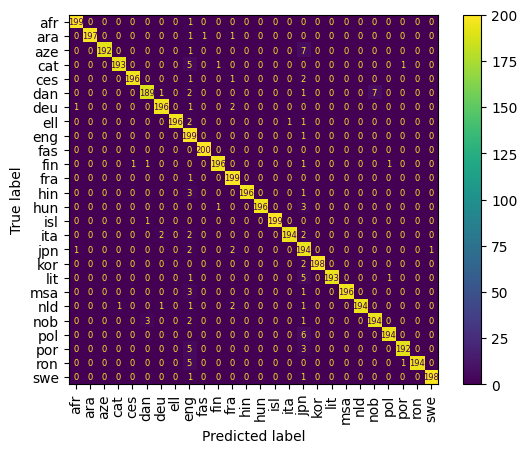

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

plt.figure(figsize=(10, 8))

plot_conf_matrix = ConfusionMatrixDisplay(cnf_matrix, display_labels = classes)
plot_conf_matrix.plot(xticks_rotation = "vertical")

ax = plt.gca()

for text in ax.texts:
    text.set_fontsize(6)
plt.show()


We have the first results.

Now, let's test it for two best performing languages, and with different number of characters. We will use the best params obtained from the results. Hence, we will make a small change in the training function, but the rest of the functions are useable with this test study.

1. First, we will filter the datasets for the two languages, and update the label encoding.
2. We update the classifier function to perform the training with the best parameters obtained.
3. We will apply the functions and print the results.

In [ ]:
two_lang = ['eng','swe']
ablation_train_df = train_df[train_df['label'].isin(two_lang)]
ablation_test_df = test_df[test_df['label'].isin(two_lang)]

le_fitted = LabelEncoder().fit(ablation_train_df['label'])
y_train_dev, y_test = le_fitted.transform(ablation_train_df['label']), le_fitted.transform(ablation_test_df['label'])

In [ ]:
def ablation_classifier(X_train, X_test, y_train, y_test):

  best_clf = LogisticRegression(**best_params, random_state=16)
  best_clf.fit(X_train, y_train)

  feature_importances = eli5.show_weights(best_clf, top=10)
  y_pred = best_clf.predict(X_test)

  return feature_importances, y_pred

In [ ]:
preprocess_train_ablation = ablation_train_df['text'].apply(preprocess)
preprocess_test_ablation = ablation_test_df['text'].apply(preprocess)

tokenized_train_ablation = preprocess_train_ablation.apply(tokenize)
tokenized_test_ablation = preprocess_test_ablation.apply(tokenize)

vectorized_train_ablation, vectorized_test_ablation = vectorize(tokenized_train_ablation, tokenized_test_ablation)
all_characters_feature, all_characters_y_pred = ablation_classifier(vectorized_train_ablation, vectorized_test_ablation, y_train_dev, y_test)

In [ ]:
ablation_train_df['text']= [text[:500] for text in ablation_train_df['text']]
preprocess_train_ablation = ablation_train_df['text'].apply(preprocess)
preprocess_test_ablation = ablation_test_df['text'].apply(preprocess)

tokenized_train_ablation = preprocess_train_ablation.apply(tokenize)
tokenized_test_ablation = preprocess_test_ablation.apply(tokenize)

vectorized_train_ablation, vectorized_test_ablation = vectorize(tokenized_train_ablation, tokenized_test_ablation)
_500_characters_feature, _500_characters_y_pred = ablation_classifier(vectorized_train_ablation, vectorized_test_ablation, y_train_dev, y_test)


<ipython-input-33-3b5abe35f5e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ablation_train_df['text']= [text[:500] for text in ablation_train_df['text']]


In [ ]:
ablation_train_df['text']= [text[:100] for text in ablation_train_df['text']]
preprocess_train_ablation = ablation_train_df['text'].apply(preprocess)
preprocess_test_ablation = ablation_test_df['text'].apply(preprocess)

tokenized_train_ablation = preprocess_train_ablation.apply(tokenize)
tokenized_test_ablation = preprocess_test_ablation.apply(tokenize)

vectorized_train_ablation, vectorized_test_ablation = vectorize(tokenized_train_ablation, tokenized_test_ablation)
_100_characters_feature, _100_characters_y_pred = ablation_classifier(vectorized_train_ablation, vectorized_test_ablation, y_train_dev, y_test)

<ipython-input-34-3365d02377ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ablation_train_df['text']= [text[:100] for text in ablation_train_df['text']]


In [ ]:
classes = le_fitted.inverse_transform(np.unique(y_train_dev))

print(classification_report(y_test, all_characters_y_pred, target_names=classes))
print(classification_report(y_test, _500_characters_y_pred, target_names=classes))
print(classification_report(y_test, _100_characters_y_pred, target_names=classes))

              precision    recall  f1-score   support

         eng       1.00      1.00      1.00       200
         swe       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

         eng       1.00      1.00      1.00       200
         swe       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

              precision    recall  f1-score   support

         eng       1.00      1.00      1.00       200
         swe       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
conf_all = confusion_matrix(y_test, all_characters_y_pred)
conf_500 =  confusion_matrix(y_test, _500_characters_y_pred)
conf_100 = confusion_matrix(y_test, _100_characters_y_pred)

<Figure size 1000x800 with 0 Axes>

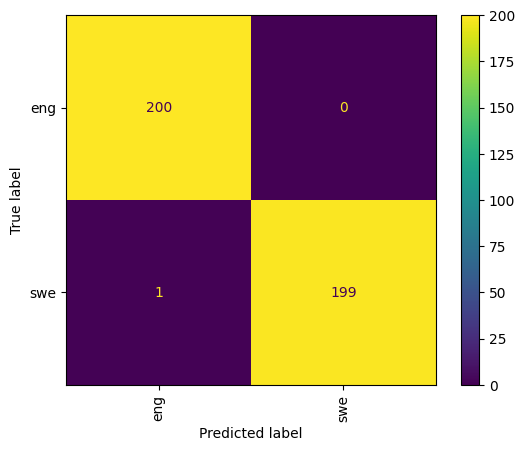

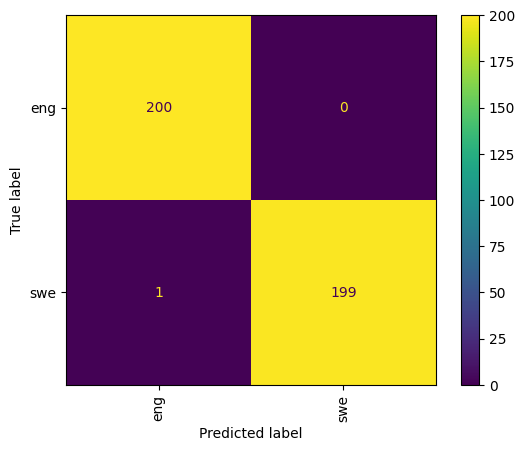

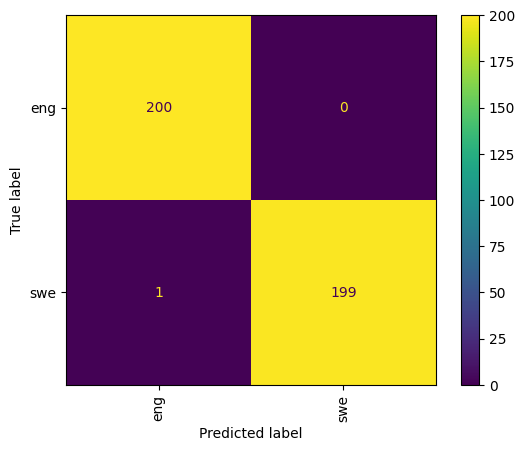

In [ ]:
plt.figure(figsize=(10, 8))

plot_conf_matrix = ConfusionMatrixDisplay(conf_all, display_labels = classes)
plot_conf_matrix.plot(xticks_rotation = "vertical")
plot_conf_matrix2 = ConfusionMatrixDisplay(conf_500, display_labels = classes)
plot_conf_matrix2.plot(xticks_rotation = "vertical")
plot_conf_matrix3 = ConfusionMatrixDisplay(conf_100, display_labels = classes)
plot_conf_matrix3.plot(xticks_rotation = "vertical")
plt.show()

We observe almost 100% success in all of the models as we did with the first model.
This may require a second look at the model to see if we appropriately separate train and test sets.
We did not observe any such difference. This result may be due to the easiness of distinguishing between languages with TFIDF. Hence, the model was able to perform well.